<a href="https://colab.research.google.com/github/astrrr/quant-lab/blob/main/lab_py_fin_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
import numpy as np
import seaborn as sns 
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style("whitegrid")
sns.__version__

'0.12.2'

# **Randoms, Histogram & Normal Distribution**

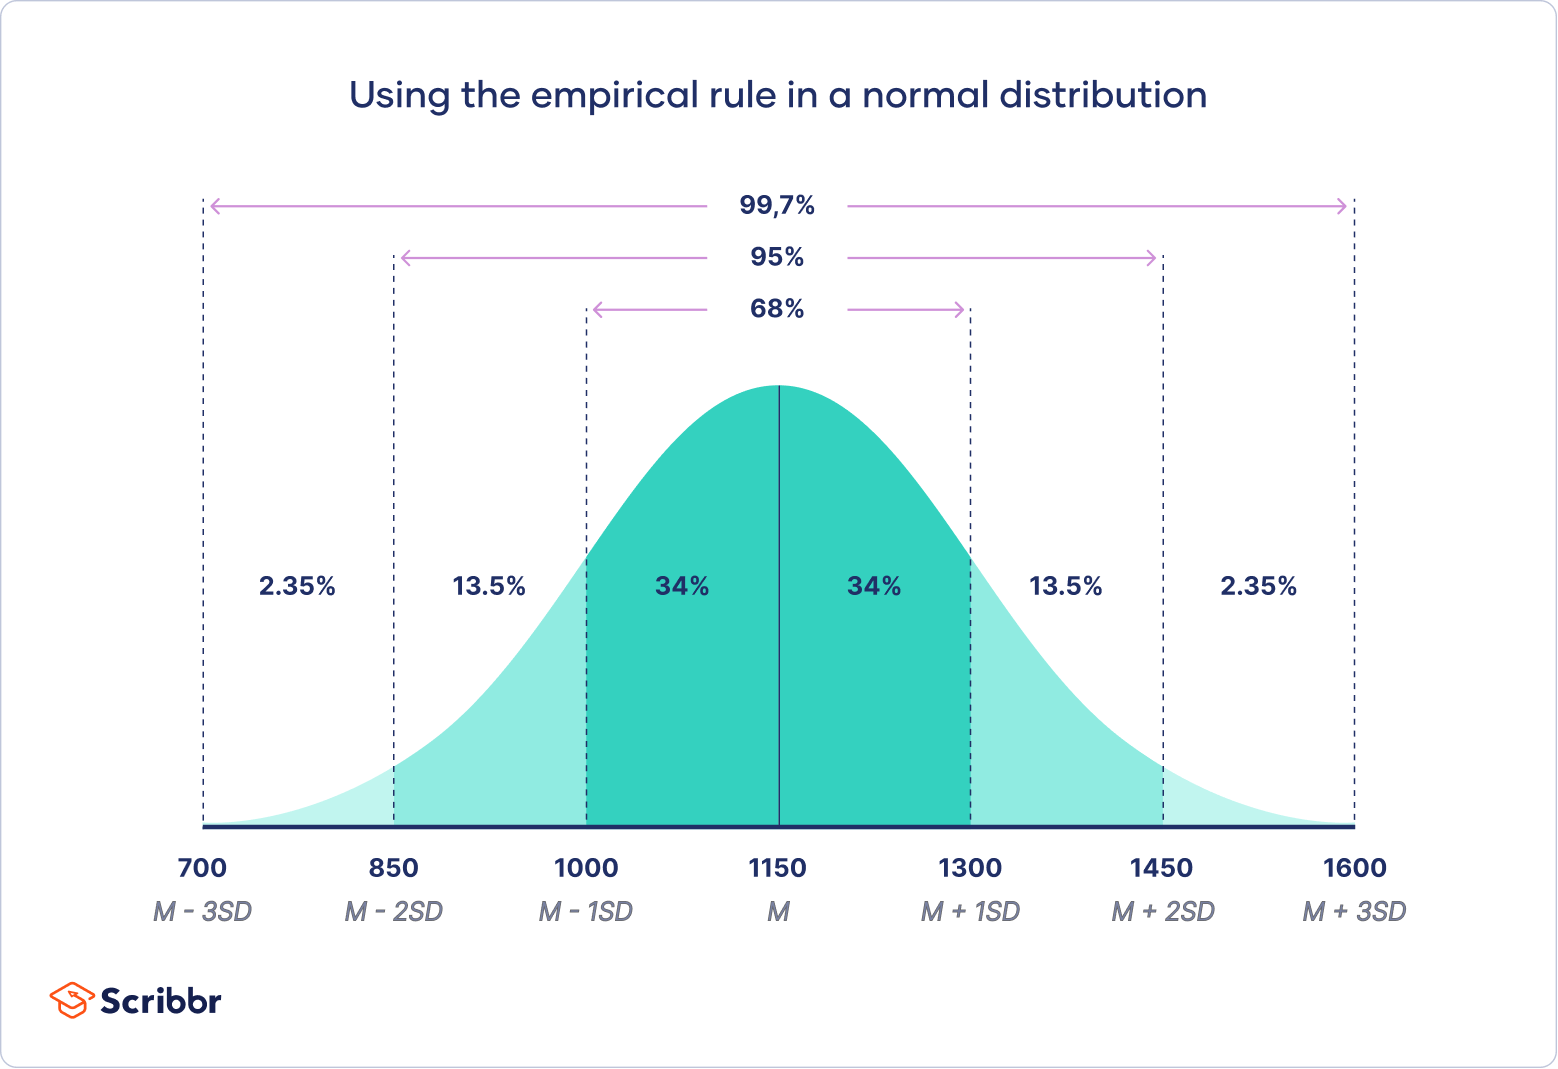

In [ ]:
np.random.seed(33)
mu, sigma = 0, 0.05
stock_a = np.random.normal(mu, sigma, 10000)

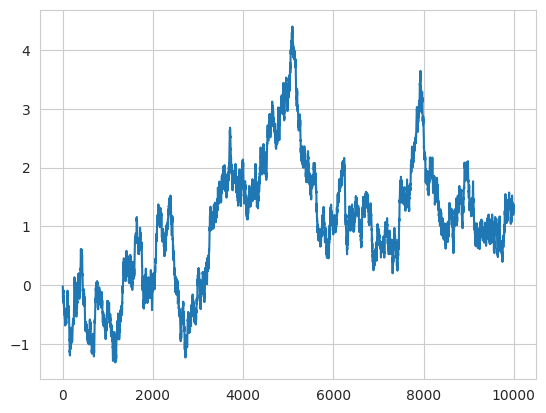

In [ ]:
plt.plot(stock_a.cumsum())

<Axes: ylabel='Count'>

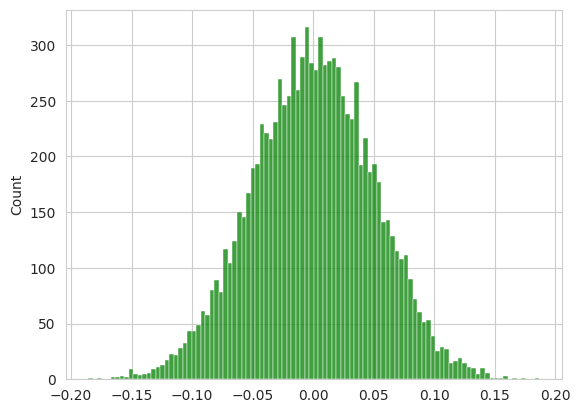

In [ ]:
sns.histplot(stock_a, bins=100, color='green')

**real data**

In [ ]:
df = yf.download('^DJI', interval='15m', start="2023-04-07", end="2023-06-02") 

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-10 09:30:00,33425.250000,33437.218750,33343.429688,33428.511719,33428.511719,9473361
2023-04-10 09:45:00,33428.378906,33448.359375,33398.558594,33418.898438,33418.898438,13082281
2023-04-10 10:00:00,33418.539062,33511.691406,33413.730469,33494.199219,33494.199219,9734599
2023-04-10 10:15:00,33492.808594,33505.101562,33435.410156,33439.531250,33439.531250,8210864
2023-04-10 10:30:00,33438.511719,33494.640625,33438.511719,33492.460938,33492.460938,7551673


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 988 entries, 2023-04-10 09:30:00 to 2023-06-01 15:45:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       988 non-null    float64
 1   High       988 non-null    float64
 2   Low        988 non-null    float64
 3   Close      988 non-null    float64
 4   Adj Close  988 non-null    float64
 5   Volume     988 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 54.0 KB


<Axes: xlabel='Close', ylabel='Count'>

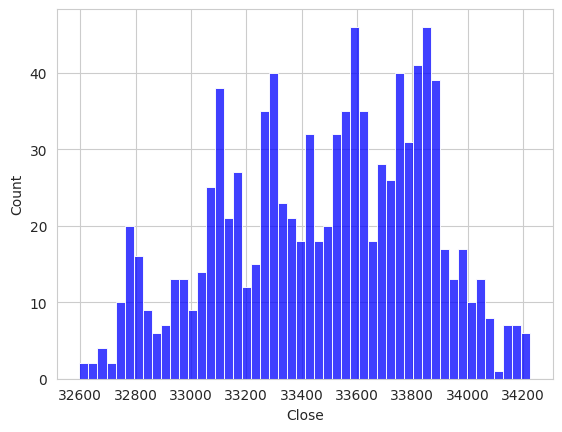

In [ ]:
sns.histplot(df['Close'], bins=50, color='blue')

In [ ]:
df_pct = df['Close'].pct_change().dropna()

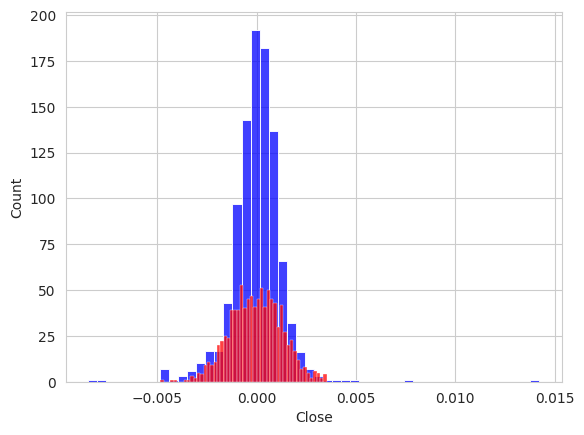

In [ ]:

mu, sigma = df_pct.mean(), df_pct.std()
stock_a = np.random.normal(mu, sigma, 978)


sns.histplot(df_pct, bins=50, color='blue')
sns.histplot(stock_a, bins=50, color='red');

In [ ]:
df_pct.shape

(987,)